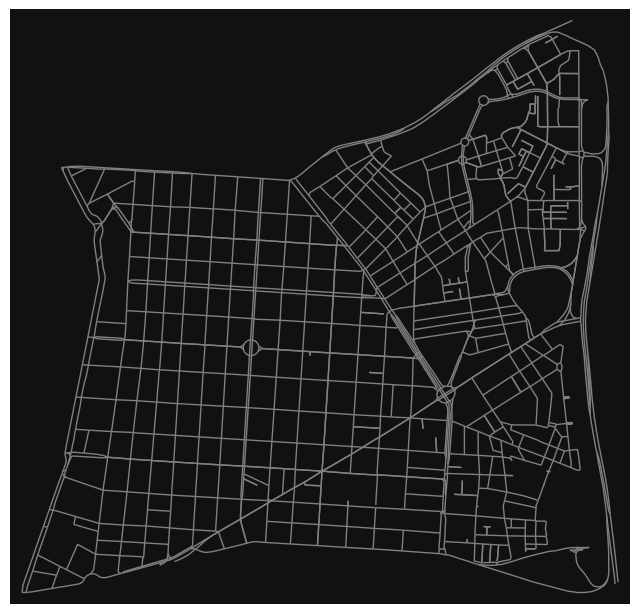

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopy.distance import geodesic

# Define la zona
place = "Salamanca, Madrid, Spain"

# Descarga la red vial para coches
G = ox.graph_from_place(place, network_type="drive")

# Simplifica y plotea
ox.plot_graph(G, node_size=0, edge_color='gray')


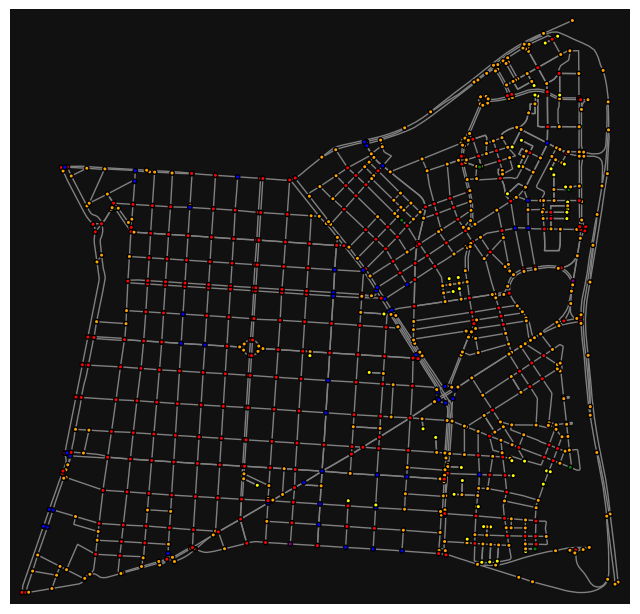

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

# Parámetros
place = "Salamanca, Madrid, Spain"
SIZE = 10  # tamaño uniforme

# Cargar grafo
G = ox.graph_from_place(place, network_type="drive")

# Detectar semáforos reales desde OSM
semaforo_nodes = [
    n for n, d in G.nodes(data=True)
    if d.get('highway') == 'traffic_signals'
]

# Detectar señales simuladas (añade tus nodos reales aquí)
signal_nodes = [list(G.nodes)[0], list(G.nodes)[10], list(G.nodes)[20]]

# Marcar tipo de nodo (y añadir atributo útil para guardar en el grafo)
for node, data in G.nodes(data=True):
    if node in semaforo_nodes:
        data["type"] = "semaforo"
    elif node in signal_nodes:
        data["type"] = "senal"
    else:
        sc = data.get('street_count', 0)
        if sc == 2:
            data["type"] = "interseccion_2"
        elif sc == 3:
            data["type"] = "interseccion_3"
        elif sc >= 4:
            data["type"] = "interseccion_4+"
        else:
            data["type"] = "irrelevante"

# Preparar listas de visualización
node_xs, node_ys, node_colors, node_sizes = [], [], [], []

for node, data in G.nodes(data=True):
    x, y = data['x'], data['y']
    tipo = data['type']

    color = {
        "semaforo": "blue",
        "senal": "purple",
        "interseccion_2": "green",
        "interseccion_3": "orange",
        "interseccion_4+": "red",
        "irrelevante": "yellow"
    }[tipo]

    node_xs.append(x)
    node_ys.append(y)
    node_colors.append(color)
    node_sizes.append(SIZE)

# Dibujar sin nodos por defecto
fig, ax = ox.plot_graph(
    G,
    node_size=0,
    edge_color='gray',
    show=False,
    close=False
)

# Añadir nodos coloreados encima
ax.scatter(
    node_xs,
    node_ys,
    c=node_colors,
    s=node_sizes,
    edgecolors='black',
    zorder=3
)

plt.show()



In [3]:
# Crear listas por tipo
lista_semaforos = []
lista_senales = []
lista_interseccion_2 = []
lista_interseccion_3 = []
lista_interseccion_4plus = []
lista_irrelevantes = []

for node, data in G.nodes(data=True):
    tipo = data["type"]
    if tipo == "semaforo":
        lista_semaforos.append(node)
    elif tipo == "senal":
        lista_senales.append(node)
    elif tipo == "interseccion_2":
        lista_interseccion_2.append(node)
    elif tipo == "interseccion_3":
        lista_interseccion_3.append(node)
    elif tipo == "interseccion_4+":
        lista_interseccion_4plus.append(node)
    elif tipo == "irrelevante":
        lista_irrelevantes.append(node)

    
# Imprimir las listas

print("Semáforos:", lista_semaforos)
print("Señales:", lista_senales)
print("Intersecciones 2 vías:", lista_interseccion_2)
print("Intersecciones 3 vías:", lista_interseccion_3)
print("Intersecciones 4+ vías:", lista_interseccion_4plus)
print("Irrelevantes:", lista_irrelevantes)


Semáforos: [171946, 25552328, 25552332, 25552334, 25552336, 25552338, 25552340, 25552352, 25552357, 25552377, 25552383, 25552384, 25552394, 25901895, 25901925, 25901950, 25903309, 25903333, 26783970, 26784046, 26784091, 27509098, 27509100, 27509101, 27509102, 27509103, 27512792, 27512808, 28096621, 28096828, 28096832, 28096866, 28096868, 28097222, 29484166, 29596138, 29596689, 29739491, 29739616, 60134601, 100890241, 143508736, 143613589, 143656433, 149218222, 149224155, 149224157, 149225904, 150553418, 158849456, 255289590, 1278838994, 1759501517, 2351032617, 2383701849, 2693214178, 2815876158, 2849943990, 3260603582]
Señales: [21627287, 25531665]
Intersecciones 2 vías: [25902468, 149232517, 150541532, 150553827, 3420144191, 3470099511]
Intersecciones 3 vías: [21473226, 21473229, 21473233, 21473235, 21473238, 21473251, 21473253, 25531143, 25531145, 25531146, 25531147, 25531151, 25531168, 25531664, 25531666, 25531676, 25531678, 25531681, 25531692, 25531694, 25531707, 25552320, 25552322

In [4]:
for node, data in G.nodes(data=True):
    if node in semaforo_nodes:
        data["type"] = str("semaforo")
    elif node in signal_nodes:
        data["type"] = str("senal")
    else:
        sc = data.get("street_count", 0)
        if sc == 2:
            data["type"] = str("interseccion_2")
        elif sc == 3:
            data["type"] = str("interseccion_3")
        elif sc >= 4:
            data["type"] = str("interseccion_4+")
        else:
            data["type"] = str("irrelevante")


In [5]:
# Descargar grafo

# ox.save_graphml(G, filepath="../data/graph_data/BaseGraph.graphml")


In [6]:
from geopy.distance import geodesic
import pandas as pd

CSV_PATH = "../data/graph_data/TL_coords.csv"
THRESHOLD_METERS = 5

# --- Leer coordenadas de semáforos desde CSV
df_semaforos = pd.read_csv(CSV_PATH)
semaforo_coords = list(zip(df_semaforos["GPSLatitude"], df_semaforos["GPSLongitude"]))

# --- Asignar tipo de nodo "semaforo" si está cerca de una coordenada conocida
for node, data in G.nodes(data=True):
    coord_node = (data["y"], data["x"])
    for coord_semaforo in semaforo_coords:
        if geodesic(coord_node, coord_semaforo).meters < THRESHOLD_METERS:
            data["type"] = "semaforo"
            break  # evitar marcar múltiples veces

# --- Guardar el grafo con los nuevos atributos
ox.save_graphml(G, filepath="../data/graph_data/graph_tl.graphml")

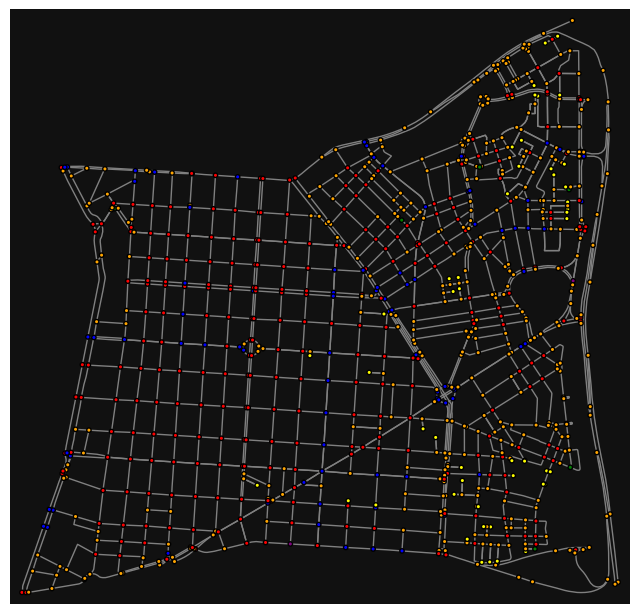

In [16]:
import osmnx as ox
import matplotlib.pyplot as plt

# Cargar el grafo con los tipos ya asignados y guardados
graph_path = "../data/graph_data/graph_tl.graphml"
G = ox.load_graphml(graph_path)

# Parámetros
SIZE = 10

# Diccionario de colores por tipo
color_map = {
    "semaforo": "blue",
    "senal": "purple",
    "interseccion_2": "green",
    "interseccion_3": "orange",
    "interseccion_4+": "red",
    "irrelevante": "yellow"
}

# Listas para visualización
node_xs, node_ys, node_colors, node_sizes = [], [], [], []

# Construir listas con prioridad visual: semáforo > señal > intersecciones > irrelevante
for node, data in G.nodes(data=True):
    x, y = data["x"], data["y"]
    tipo = data.get("type", "irrelevante")
    color = color_map.get(tipo, "yellow")

    node_xs.append(x)
    node_ys.append(y)
    node_colors.append(color)
    node_sizes.append(SIZE)

# Dibujar grafo sin nodos por defecto
fig, ax = ox.plot_graph(
    G,
    node_size=0,
    edge_color='gray',
    show=False,
    close=False
)

# Pintar nodos personalizados por tipo
ax.scatter(
    node_xs,
    node_ys,
    c=node_colors,
    s=node_sizes,
    edgecolors='black',
    zorder=3
)

plt.show()


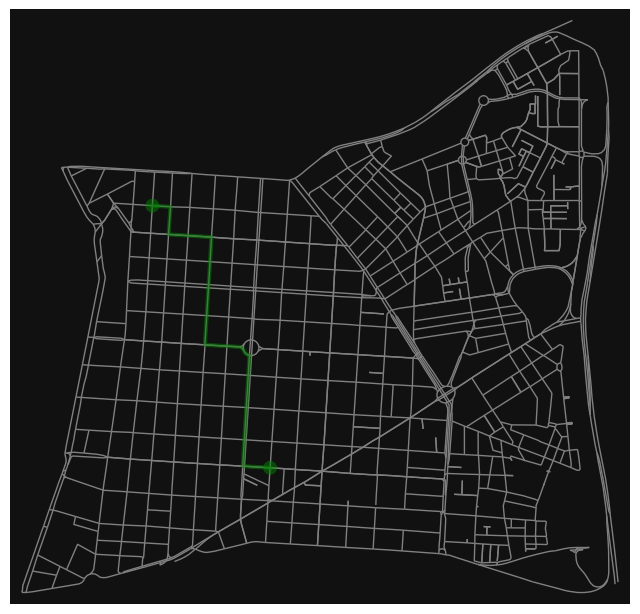

In [20]:
import osmnx as ox
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Cargar grafo
graph_path = "../data/graph_data/graph_tl.graphml"
G = ox.load_graphml(graph_path)

# --- FUNCIÓN DE HEURÍSTICA ---
def heuristic(u, v):
    """Devuelve la distancia geodésica entre dos nodos u y v"""
    coord_u = (G.nodes[u]["y"], G.nodes[u]["x"])
    coord_v = (G.nodes[v]["y"], G.nodes[v]["x"])
    return geodesic(coord_u, coord_v).meters

# --- DEFINIR ORIGEN Y DESTINO (coordenadas aproximadas dentro del barrio Salamanca)
lat_origen, lon_origen = 40.436293, -3.685242
lat_destino, lon_destino = 40.424965, -3.678606

# Obtener el nodo más cercano a esas coordenadas
origen = ox.distance.nearest_nodes(G, lon_origen, lat_origen)
destino = ox.distance.nearest_nodes(G, lon_destino, lat_destino)

# --- CALCULAR RUTA A* ---
ruta = nx.astar_path(G, origen, destino, heuristic=heuristic, weight="length")

# --- VISUALIZAR EL GRAFO CON LA RUTA EN VERDE ---
fig, ax = ox.plot_graph_route(
    G,
    route=ruta,
    route_color="green",
    route_linewidth=3,
    node_size=0,
    edge_color="gray"
)
